In [2]:
#Import libraries
import mne 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [164]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataA = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataA[cond][ID] = raw.get_data()
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataA.pkl', 'wb') as f:
        pickle.dump(DataA, f)
f.close()

In [134]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataB = raw.copy()

In [151]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


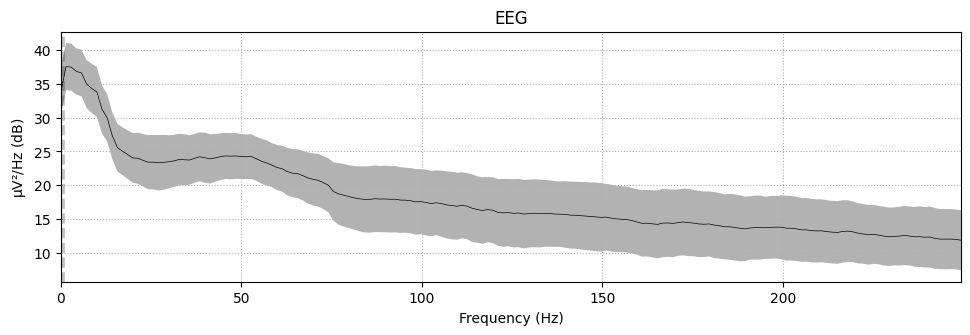

In [14]:
%matplotlib qt
DataB['EO']['2001'].compute_psd(method='multitaper').plot(average=True)
DataB['EC']['2001'].compute_psd(method='multitaper').plot(average=True)
DataB['SED_1']['2001'].compute_psd(method='multitaper').plot(average=True)

In [9]:

#file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
#with open(file_path,'rb') as g:
#            raw = pickle.load(g)
#DataA = raw.copy()
DataA_LowP = DataB.copy()
#Apply highpass filter
for key in DataB.keys():
    for per in DataB[key].keys():
        DataA_LowP[key][per] = DataB[key][per].filter(None,100,method='iir')

#Change the filename
nufilename = filename.split(".",maxsplit=1)[0]
nufilename = nufilename + "_LowPassed_mne.pkl"

##Assign new directory for storage in platon##
Dir1 = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\HighPassedData'
savepath = os.path.join(Dir1,folder)
FullSavePath = os.path.join(savepath,nufilename)

#Save the new file
#with open(FullSavePath, 'wb') as f:
#    pickle.dump(DataA_LowP, f) 
#
#f.close()
#g.close()     

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 dB

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 dB

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 dB

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 

NameError: name 'filename' is not defined

In [11]:
DataB['EC']['2001'].psd_array_multitaper().plot(average=True)
print(DataA['EC'])

AttributeError: 'Epochs' object has no attribute 'psd_array_multitaper'

In [20]:
%matplotlib qt

root_folder = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB.pkl"
#Loop through all the data and group the psd by condition, then plot the comparison
psdss = [[0],[0],[0],[0],[0],[0],[0],[0]]
t = 0
for cond in DataA.keys():
    i = 0
    pitstop = list()
    #if cond not in ['INDUCTION','EMERGENCE', 'SED_2', 'SED_3', 'EC', 'EO']:
    for pers in DataB[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataA[cond][pers],sfreq=500)
        pitstop.append(np.mean(np.mean(psds,axis=0),axis=0))
        i += 1
    psdss[t] = [np.mean(pitstop,axis=0)]
    t += 1 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [34]:

plt.figure()
plt.plot(sfreq,list(np.array(psdss[0]).T),color='black',label='EO')
plt.plot(sfreq,list(np.array(psdss[1]).T),color='black',label='EC')
plt.plot(sfreq,list(np.array(psdss[2]).T),color='red',label='Induction')
plt.plot(sfreq,list(np.array(psdss[3]).T),color='red',label='SED_1')
plt.plot(sfreq,list(np.array(psdss[4]).T),color='red',label='SED_2')
plt.plot(sfreq,list(np.array(psdss[5]).T),color='red',label='SED_3')
plt.plot(sfreq,list(np.array(psdss[6]).T),color='red',label='SED_4')
plt.plot(sfreq,list(np.array(psdss[7]).T),color='black',label='Emergence')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.legend()
plt.show()

In [65]:
import pandas as pd
import math

In [137]:
print(DataB['EO']['SD5001'])
print(DataA['EO']['SD5001'].shape)

<Epochs |  33 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~5.7 MB, data loaded,
 '1': 33>
(33, 63, 351)


In [154]:
def total_sum(A,B):
    if type(A) == str:
        A = int(float(A))
    if type(B) == str:
        B = int(float(B))
    if math.isnan(A) & math.isnan(B):
        return 0
    elif math.isnan(B):
        return A
    elif math.isnan(A):
        return B
    else:
        return int(A) + int(B)

In [101]:
def find_string_3d(string, arr):
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                if arr[i][j][k] == string:
                    return int(string.split(': ',maxsplit=1)[1])
    return UserWarning("ED score not found")


In [115]:
def get_dimensions(arr):
    if isinstance(arr, list):
        dimensions = [len(arr)]
        sub_dimensions = get_dimensions(arr[0])
        if isinstance(sub_dimensions, list):
            dimensions.extend(sub_dimensions)
        return dimensions
    else:
        return UserWarning("Not a list object")


In [191]:
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [192]:
#### Compare ego dissolution vs. non-ego dissolution ####

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
            DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
for cond in DataAd.keys():
        for pers in DataAd[cond]:
            if pers != '2001':
                if cond not in ket_conds:
                    DataAd[cond][pers] = [DataA[cond][pers]] + ["ED: 0"]
                else:
                    DataAd[cond][pers] = [DataA[cond][pers]]+[f"ED: {total_sum(df.loc[Q_corresp[ket_conds.index(cond)],pers],df.loc[Q_corresp[ket_conds.index(cond)]+1,pers])}"]
                print(DataAd[cond][pers])

#Compute the psd and plot the two graphs
psdss = [[0],[0],[0]]
for cond in DataAd.keys():
    pitstop = list()
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers][0],sfreq=500)
        psdss[find_string_3d('ED',DataAd[cond][pers][1])] = [np.mean(np.mean(psds,axis=0),axis=0)]

plt.figure()
plt.plot(sfreq,list(np.array(psdss[0]).T),color='black',label='Non-ED')
plt.plot(sfreq,list(np.array(psdss[1]).T),color='blue',label='ED: 1')
plt.plot(sfreq,list(np.array(psdss[2]).T),color='red',label='ED: 2')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.legend()
plt.show()


[array([[[-2.35767375e-06, -3.02550177e-06, -5.20353465e-06, ...,
         -1.48712165e-05, -1.72061599e-05, -1.79028177e-05],
        [-1.58899258e-06, -1.00162218e-06, -1.67684456e-06, ...,
          2.49793845e-06,  1.77968949e-06,  1.49508166e-06],
        [-1.89841083e-06, -3.08786908e-06,  1.78972811e-06, ...,
         -1.01491133e-05, -9.95521867e-06, -1.23110666e-05],
        ...,
        [ 1.11664563e-06, -1.69513292e-06, -3.55340911e-06, ...,
         -6.80846893e-06, -8.59391226e-06, -8.68332498e-06],
        [-1.43011302e-06, -6.65503238e-07,  8.18727411e-07, ...,
         -2.47037914e-07, -9.76371521e-07, -2.43727064e-06],
        [-6.96984486e-06, -7.57611455e-07,  3.97822128e-06, ...,
         -2.23859846e-05, -2.31789383e-05, -2.72698377e-05]],

       [[-6.74158239e-06, -4.03046601e-06, -2.06776208e-06, ...,
         -6.31641545e-06, -1.12689455e-05, -1.00460832e-05],
        [ 9.39769318e-07, -1.55956231e-06, -5.59723534e-07, ...,
         -1.57415114e-06, -4.75653190

In [198]:
#Compute the psd and plot the two graphs
psdss = [[0],[0],[0]]
t = 0
for cond in DataAd.keys():
    i = 0
    pitstop = list()
    for pers in DataAd[cond]:
        if pers != '2001':
            psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers][0],sfreq=500)
            print(DataAd[cond][pers])
            psdss[int(DataAd[cond][pers][1].split(': ')[1])] = [np.mean(np.mean(psds,axis=0),axis=0)]

plt.figure()
plt.plot(sfreq,list(np.array(psdss[0]).T),color='black',label='Non-ED')
plt.plot(sfreq,list(np.array(psdss[1]).T),color='black',label='ED: 1')
plt.plot(sfreq,list(np.array(psdss[2]).T),color='red',label='ED: 2')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.legend()
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
[array([[[-2.35767375e-06, -3.02550177e-06, -5.20353465e-06, ...,
         -1.48712165e-05, -1.72061599e-05, -1.79028177e-05],
        [-1.58899258e-06, -1.00162218e-06, -1.67684456e-06, ...,
          2.49793845e-06,  1.77968949e-06,  1.49508166e-06],
        [-1.89841083e-06, -3.08786908e-06,  1.78972811e-06, ...,
         -1.01491133e-05, -9.95521867e-06, -1.23110666e-05],
        ...,
        [ 1.11664563e-06, -1.69513292e-06, -3.55340911e-06, ...,
         -6.80846893e-06, -8.59391226e-06, -8.68332498e-06],
        [-1.43011302e-06, -6.65503238e-07,  8.18727411e-07, ...,
         -2.47037914e-07, -9.76371521e-07, -2.43727064e-06],
        [-6.96984486e-06, -7.57611455e-07,  3.97822128e-06, ...,
         -2.23859846e-05, -2.31789383e-05, -2.72698377e-05]],

       [[-6.74158239e-06, -4.03046601e-06, -2.06776208e-06, ...,
         -6.31641545e-06, -1.12689455e-05, -1.00460832e-05],
        [ 9.39769318e-07, -1.55956231e-06